In [60]:
# !pip install quicklookts
import quicklookts as ql
import pandas as pd
import numpy as np

In [80]:
test_df=pd.read_csv('test_data.csv')

# test_df

In [69]:

# ql.quicklook(test_df, timetoseebegin='7-15-2022', timetoseeend='11-15-2022', curve1='lw_temp_2', curve2='lw_temp_3')

In [110]:
import datetime as dt

In [119]:
def quicklook(df_plot_in, timetoseebegin=None, timetoseeend=None, curve1=None, curve2=None, *args, **kwargs):
    '''
    function to plot timeseries plot for QC purpose
    can select time window to see
    tbelow will be computed from ref_lwuw
    version 0.0.9
    example: 
        timetoseebegin='2022-06-09' 
        timetoseeend='2022-11-14'
        1. quick_look(df_plot, timetoseebegin, timetoseeend)
        2. quick_look1(test_df, timetoseebegin='10-15-2022', \
        timetoseeend='11-15-2022', curve1='Tbelow', curve2='prediction')
        
    '''
    #1. create copy of dataframe
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    
    try:
        df_plot=df_plot_in.set_index('time')
        df_plot.index=pd.to_datetime(df_plot.index)


        timeflag=(df_plot.index>timetoseebegin) &  (df_plot.index<timetoseeend)
        print(df_plot.index.min(), df_plot.index.max(),timetoseebegin, timetoseeend, timeflag.sum())
        if 'ref_lwuw' in df_plot.columns.tolist():
            df_plot['ref_tbelow']=(abs(df_plot['ref_lwuw'])/5.67e-8)**0.25-273.2


        for dev in df_plot.device.unique().tolist():
            ax=df_plot[(df_plot['device']==dev) & timeflag ][curve1].plot(color='red', title=f'{dev}',figsize=(12,4))
            if curve2:
                ax2=df_plot[(df_plot['device']==dev) & timeflag ][curve2].plot( secondary_y=True, color='blue', ax=ax)
            ax.set_ylabel(f'{curve1}', color='red')
            if curve2:
                ax2.set_ylabel(f'{curve2}', color='blue')

            ax.set_ylim(-10,70)
            if curve2:
                ax2.set_ylim(-10,70)

            plt.show()

        #delete the temporary file for visualization
        df_plot.reset_index(drop=True)
    except:
        print("error in input data please check")


2022-06-29 21:15:07+00:00 2022-08-31 23:55:00+00:00 7-15-2021 11-15-2023 29564


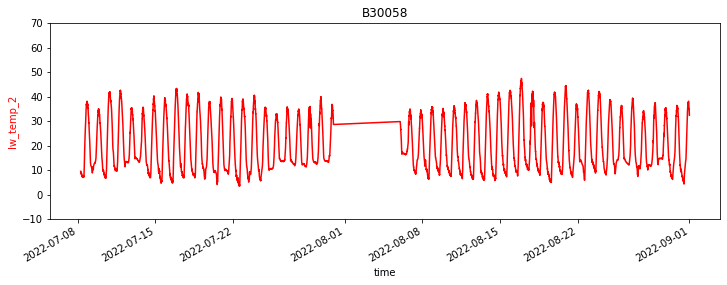

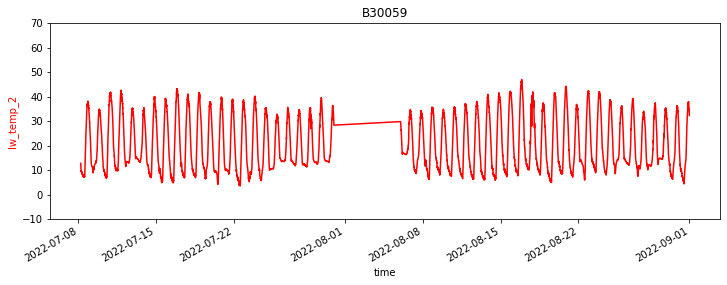

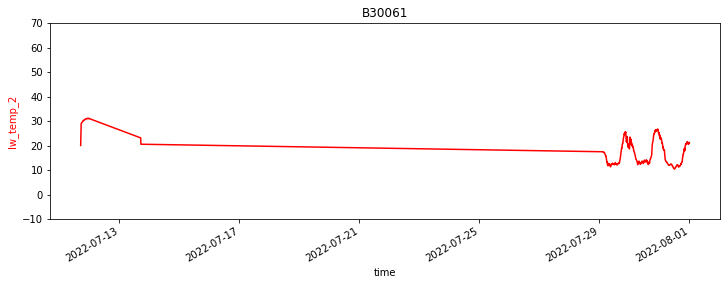

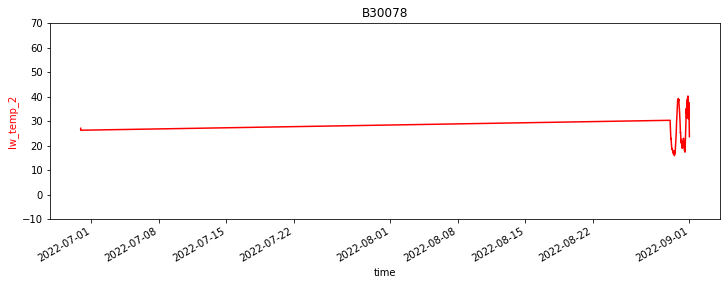

In [120]:
quicklook(test_df, timetoseebegin='7-15-2021', timetoseeend='11-15-2023', curve1='lw_temp_2')